In [15]:
%reload_ext tensorboard
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import datetime

mnist = tf.keras.datasets.mnist #aca puedes poner cualquier dataset de imagenes que quieras
#clasificar, ejemplos son mnist y fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [16]:


model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [17]:
model.fit(x_train, y_train, epochs=3)  # train the model

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 195us/sample - loss: 0.2642 - accuracy: 0.9221
Epoch 2/3
60000/60000 [==============================] - 11s 191us/sample - loss: 0.1073 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 11s 178us/sample - loss: 0.0741 - accuracy: 0.9765


In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 1s 78us/sample - loss: 0.0995 - accuracy: 0.9683
0.0995397640682757
0.9683


In [19]:
model.save('epic_num_reader.model') #para guardar el modelo

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [20]:
model = tf.keras.models.load_model('epic_num_reader.model')


In [21]:
predictions = model.predict(x_test)

In [22]:
print(predictions)

[[2.0372506e-06 1.1952886e-06 3.1359613e-04 ... 9.9859446e-01
  2.7583408e-06 7.9469883e-06]
 [5.6027005e-09 1.9248346e-05 9.9996197e-01 ... 1.9562435e-08
  1.1723876e-06 5.9045217e-12]
 [4.2779942e-07 9.9900913e-01 1.9958830e-05 ... 3.9412917e-05
  8.4889331e-04 2.0897105e-06]
 ...
 [2.5846163e-07 4.4896810e-06 1.0565391e-06 ... 8.3342653e-05
  2.2611377e-05 8.9293596e-04]
 [1.5500466e-06 1.0442385e-07 6.2995660e-08 ... 2.0612379e-08
  5.7653483e-04 9.7841124e-08]
 [1.0670278e-06 3.0792609e-08 1.6845182e-07 ... 5.8908189e-10
  6.1947752e-08 3.6128887e-09]]


In [23]:
import numpy as np

print(np.argmax(predictions[12]))
#Esto imprime la prediccion que hizo la red respecto a la imagen siguiente

9


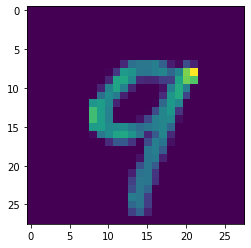

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_test[12])
plt.show()

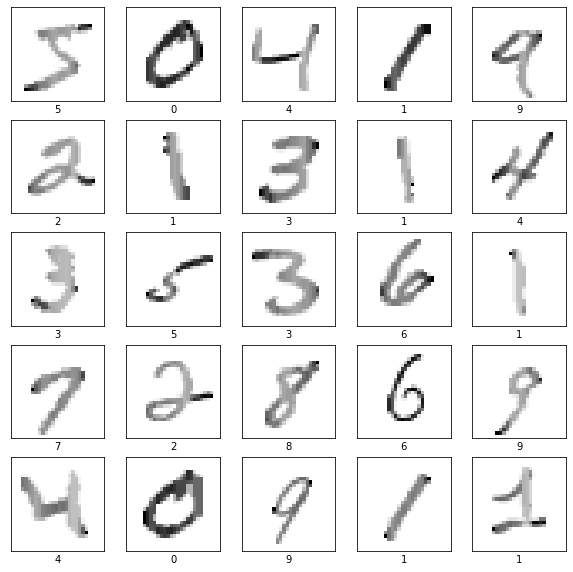

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()
#Aca se puede ver cual es la clasificacion de las imagenes, para verificar que la red acerto

3.6.9
